In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


Text(0, 0.5, 'Y')

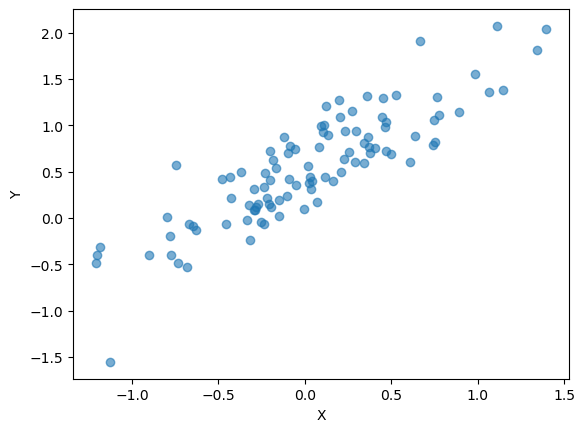

In [2]:
X_train = np.random.randn(100)
X_train /= 2
y_train = 2 * X_train + 1 + np.random.randn(100) * 0.5
y_train /= 2
plt.scatter(X_train, y_train, alpha = 0.6)
plt.xlabel('X')
plt.ylabel('Y')

In [3]:
w0 = 7
b0 = -10
W = tf.Variable(w0 * tf.ones([1]), name = 'weight')
b = tf.Variable(b0 * tf.ones([1]), name = 'bias')

In [4]:
W.shape, W, b.shape, b

(TensorShape([Dimension(1)]),
 <tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>,
 TensorShape([Dimension(1)]),
 <tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>)

In [5]:
hypothesis = X_train * W + b

In [6]:
# MSE
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

In [8]:
sess = tf.Session()

In [9]:
sess.run(tf.global_variables_initializer())

In [10]:
nb_epoch = 1000

In [11]:
vw = []
vb = []
vcost = []

In [12]:
for step in range(nb_epoch + 1):
    sess.run(train)
    w1 = sess.run(W)[0]
    b1 = sess.run(b)[0]
    cost1 = sess.run(cost)
    vw.append(w1)
    vb.append(b1)
    vcost.append(cost1)
    if step % 100 == 0:
        print(step, '--', cost1, '--', w1, '--', b1)

0 -- 113.69755 -- 6.9700756 -- -9.793029
100 -- 5.593977 -- 4.4460745 -- -0.9523629
200 -- 1.2539046 -- 2.9038937 -- 0.26682997
300 -- 0.43324876 -- 2.0334432 -- 0.45547357
400 -- 0.19233936 -- 1.5507145 -- 0.49551323
500 -- 0.11920462 -- 1.2841156 -- 0.509129
600 -- 0.0969587 -- 1.1370254 -- 0.51551867
700 -- 0.090191215 -- 1.0558904 -- 0.51889485
800 -- 0.08813248 -- 1.0111396 -- 0.52073723
900 -- 0.08750618 -- 0.986457 -- 0.5217508
1000 -- 0.087315656 -- 0.9728432 -- 0.52230954


In [13]:
w1 = sess.run(W)[0]
b1 = sess.run(b)[0]
str1 = f'y = {w1}x + {b1}'
print(w1, b1)
print(str1)

0.9728432 0.52230954
y = 0.9728432297706604x + 0.5223095417022705


Text(0.5, 1.0, "<class 'str'>")

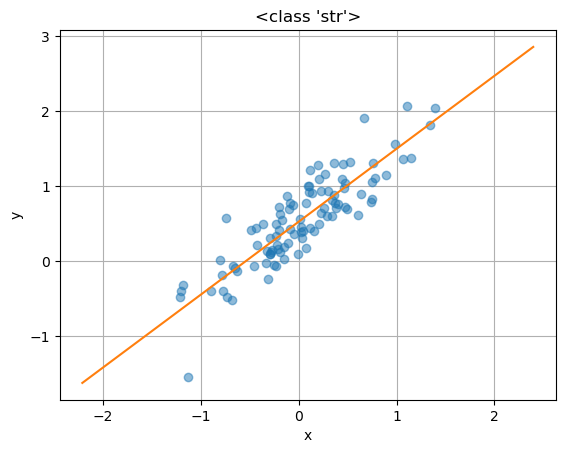

In [14]:
plt.figure(1)
plt.plot(X_train, y_train, 'o', alpha = 0.5)
x1 = np.min(X_train) - 1, np.max(X_train) + 1
y1 = np.dot(w1, x1) + b1
plt.plot(x1, y1)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title(str)

Text(0, 0.5, 'b')

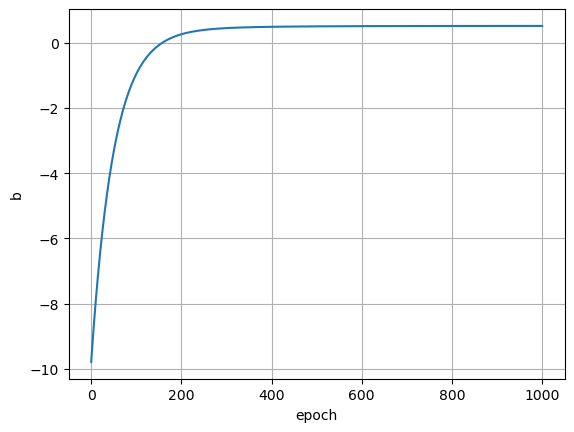

In [15]:
plt.plot(vb)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('b')

Text(0, 0.5, 'w')

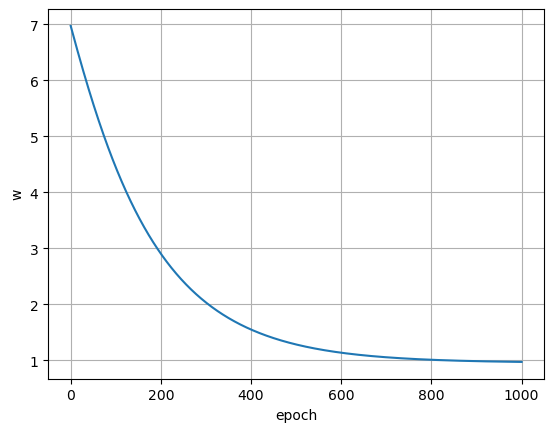

In [16]:
plt.plot(vw)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('w')

Text(0, 0.5, 'cost')

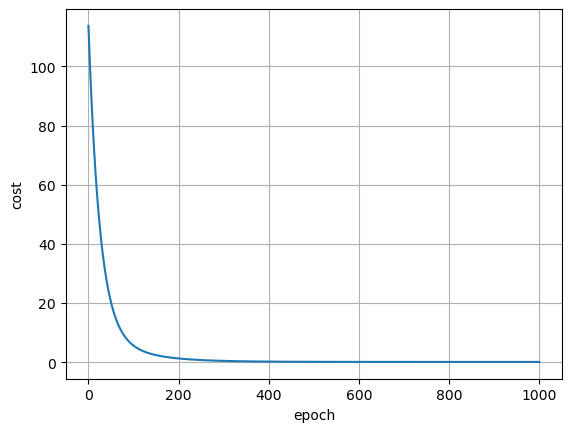

In [17]:
plt.plot(vcost)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('cost')